# Разведывательный анализ данных (EDA). Итоговое задание.

# Выполнено

* Гиль Юлия
* Группа DSPR-28

# Постановка задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

# Описание датасета
1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


# Разведывательный анализ данных (EDA)

Можно выделить основные шаги:

- [x] Посмотреть на данные.
- [x] Проверить данные на пустые значения.
- [x] Проверить данные на дублированные/полностью скоррелированные значения.
- [x] Проверить данные на наличие выбросов.
- [x] Отобрать данные, пригодные для дальнейшего построения модели.
- [x] Снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.

# Рекомендации по выполнению проекта
- [x]  Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- [x]  Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- [x]  Оцените количество уникальных значений для номинативных переменных.
- [ ]  По необходимости преобразуйте данные
- [x]  Проведите корреляционный анализ количественных переменных
- [x]  Отберите не коррелирующие переменные.
- [x]  Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- [x]  Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

# Выполнение задания

## 1. Проводим первичную обработку данных.
### 1.1 Посмотрим на данные, подготовим датасет к работе.

In [67]:
# Импортируем необходимые библиотеки, открываем датасет для дальнейшей работы.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import random
import pandas_profiling

import warnings
warnings.simplefilter('ignore')
%matplotlib inline
sns.set()

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

In [2]:
# В данном блоке задаем функции, используемые далее.

def intitial_eda_checks(df, missing_percent):
    '''
    Функция принимает на вход датафрейм, а также заданный % пустых значений, который хотим обработать. 
    На выход выводит на экран информацию о сумме пустых значений для всех колонок, а также проце
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False)
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False)
        percent = mask_percent[mask_percent > 0]

        series = mask_percent[mask_percent > missing_percent]
        columns = series.index.to_list()
        print(columns)

        missing_data = pd.concat(
            [total, round(percent*100, 2)], axis=1, keys=['Количество', '%'])
        print(f'Сумма и процент значений NaN:\n {missing_data}')
        return columns
    else:
        print('NaN значения не найдены.')


def iqr_analysis(series):
    """
    Функция выводит инфорамцию о границах выборосов для признака.
    """
    IQR = series.quantile(0.75) - series.quantile(0.25)
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


def random_fill_na(df, cols):
    """ 
    Функция заменяет пропущенные значения (NaN) на одно из значений в колонке, выбирается рандомно.
    На вход функция принимает имя датафрейма и колонки, в которых нужно произвести замену. 
    Функция возвращает обработанный датафрейм.
    """
    for column in cols:
        # вставляем рандомные значения в пустые клетки таблицы
        df[column].fillna(random.choice(df[df[column] != np.nan][column].value_counts().index), inplace=True)
    return df


def mode_fill_na(df, cols):
    """ 
    Функция заменяет пропущенные значения (NaN) на значение моды (наиболее часто используемого значения) в колонке.
    На вход функция принимает имя датафрейма и колонки, в которых нужно произвести замену. 
    Функция возвращает обработанный датафрейм.
    """
    for column in cols:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df


def get_boxplot_2(column):
    """
    Функция для отрисовки коробочной диаграммы для нечисловых величин.
    На вход получаем список колонок для отрисовки. 
    """
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='math_score',
                # тест проводим на изначальном наборе данных без NA значений для целевого столбца, столбца с признаком,
                # дополнительно исключив 0 для оценок
                data=stud.dropna(subset=[column, 'math_score'])[
                    stud.math_score != 0],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot для ' + column)
    plt.show()


def get_stat_dif_2(column):
    """ 
    Поиск статистически значимых различий для колонки с помощью теста Стьюдента.
    """
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    # Тест проводим на изначальном наборе данных без NA значений для целевого столбца, столбца с признаком, дополнительно исключив 0 для оценок
    stud_stat = stud.dropna(subset=[column, 'math_score'])[
        stud.math_score != 0]
    for comb in combinations_all:
        if ttest_ind(stud_stat.loc[stud.loc[:, column] == comb[0], 'math_score'],
                     stud_stat.loc[stud.loc[:, column] == comb[1], 'math_score']).pvalue <= 0.05/len(combinations_all):  # учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [3]:
# Проверим, что данные на самом деле верного типа, как указано в info. Находим первую строку, где нет nan-ов.
for col in stud.columns:
    print("column", col, ':', stud[col][4], type(stud[col][0]))

column school : GP <class 'str'>
column sex : F <class 'str'>
column age : 16 <class 'numpy.int64'>
column address : U <class 'str'>
column famsize : GT3 <class 'float'>
column Pstatus : T <class 'str'>
column Medu : 3.0 <class 'numpy.float64'>
column Fedu : 3.0 <class 'numpy.float64'>
column Mjob : other <class 'str'>
column Fjob : other <class 'str'>
column reason : home <class 'str'>
column guardian : father <class 'str'>
column traveltime : 1.0 <class 'numpy.float64'>
column studytime : 2.0 <class 'numpy.float64'>
column failures : 0.0 <class 'numpy.float64'>
column schoolsup : no <class 'str'>
column famsup : yes <class 'str'>
column paid : yes <class 'str'>
column activities : no <class 'str'>
column nursery : yes <class 'str'>
column studytime, granular : -6.0 <class 'numpy.float64'>
column higher : yes <class 'str'>
column internet : no <class 'float'>
column romantic : no <class 'str'>
column famrel : 4.0 <class 'numpy.float64'>
column freetime : 3.0 <class 'numpy.float64'>
co

**Из необычного**: famsize - float, хотя pandas посчитал данные типа object.

In [4]:
# Для удобства использования переименуем все столбцы.
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
# Всего 30 колонок.
len(stud.columns)

30

In [6]:
stud.rename(columns={"famsize": "family_size",
                     "Pstatus": "parent_status",
                     "address": "address_type",
                     "Medu": "mother_edu_rate",
                     "Fedu": "father_edu_rate",
                     "Fjob": "father_job",
                     "Mjob": "mother_job",
                     "reason": "school_reason",
                     "traveltime": "travel_time_rate",
                     "studytime": "study_time_rate",
                     "schoolsup": "school_support",
                     "studytime, granular": "study_time_granular",
                     "famsup": "family_support",
                     "paid": "math_paid",
                     "higher": "higher_edu",
                     "paid": "math_paid",
                     "romantic": "romantic_relat",
                     "famrel": "family_relat_rate",
                     "freetime": "free_time_rate",
                     "goout": "go_out_time_rate",
                     "health": "health_rate",
                     "absences": "absences_num",
                     "score": "math_score"}, inplace=True)

### 1.2 Посмотрим на данные (предварительно)

In [7]:
# Предварительный просмотр характеристик по всем числовым данным (видим, где данные неполные, предварительно, видны выбросы)
stud.describe()

,age,mother_edu_rate,father_edu_rate,travel_time_rate,study_time_rate,failures,study_time_granular,family_relat_rate,free_time_rate,go_out_time_rate,health_rate,absences_num,math_score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


**Подозрения/план**:
* Есть пропуски во всех данных, кроме age. Особое внимание уделить math_score, т.к. это целевой признак.
* Кажется, что есть ошибки/выбросы в father_edu, family_relat_rate
* Данные с рейтами типа family_relat_rate, free_time_rate, go_out_time_rate - условно числовые, т.к. на самом деле разбивают данные по категориям. Для заполнения пустых значений, лучше брать не среднее, а моду или среднее, округленное до целой части

In [8]:
# Предварительный просмотр характеристик по всем номинативным данным (видим, где данные неполные, предварительно, видны выбросы)
stud.describe(include=['object'])

,school,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


**Подозрения/план:**
* Есть пропуски во всех данных, кроме school, sex.
* Во всех столбцах уникальных категорий не много (от 2 до 5), но и нет колонок, где есть только одно значение. Такие колонки можно было бы удалить.
* Данные в school_support, higher_edu - подавляющее большинство ответов одинаковые. Проверить значимость альтернативных ответов. Если коррекляции не будет, то потенциально колонки на удаление.

### 1.3 Проведем работу с пустыми значениями / выбросами / скорреллированными признаками

**Посмотрим вцелом на наличие пустых значений и определим стратегию работы с ними.**

В таблице выведена информация по всем пустым значениям для всех столбцов датасета. Итого в **27 из 30** столбцов есть пропущенные значения. 

In [9]:
nan_columns = intitial_eda_checks(stud, 0)

['parent_status', 'math_paid', 'family_support', 'father_job', 'internet', 'romantic_relat', 'guardian', 'travel_time_rate', 'family_size', 'family_relat_rate', 'father_edu_rate', 'failures', 'higher_edu', 'mother_job', 'school_reason', 'address_type', 'nursery', 'health_rate', 'activities', 'absences_num', 'free_time_rate', 'school_support', 'go_out_time_rate', 'study_time_rate', 'study_time_granular', 'math_score', 'mother_edu_rate']
Сумма и процент значений NaN:
                      Количество      %
parent_status                45  11.39
math_paid                    40  10.13
family_support               39   9.87
father_job                   36   9.11
internet                     34   8.61
romantic_relat               31   7.85
guardian                     31   7.85
travel_time_rate             28   7.09
family_size                  27   6.84
family_relat_rate            27   6.84
father_edu_rate              24   6.08
failures                     22   5.57
higher_edu            

Посморим на то, где у нас отсутствуют значения вообще.

<AxesSubplot:>

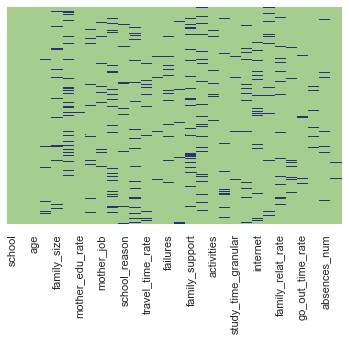

In [10]:
sns.heatmap(stud.isnull(), yticklabels=False, cbar=False, cmap='crest')

Поскольку колонок много (30), строк не очень много (395), а пропуски есть почти во всех колонках, при этом пропуски по разным колонкам распределены по разным строкам, то удалять строки не будем. 

Попробуем максимально заполнить пропуски.

**Разделяем датасет на два: один с качественными значениями, а другой - с количественными**

In [11]:
df_numerical = stud.select_dtypes(include=[np.number])
df_categorical = stud.select_dtypes(exclude=[np.number])

In [12]:
df_numerical.columns

Index(['age', 'mother_edu_rate', 'father_edu_rate', 'travel_time_rate',
       'study_time_rate', 'failures', 'study_time_granular',
       'family_relat_rate', 'free_time_rate', 'go_out_time_rate',
       'health_rate', 'absences_num', 'math_score'],
      dtype='object')

df_categorical.columns

**Работаем с количественными данными**

Определяем, нет ли "колонок - шпионов" в количественных данных. 
Мы называем эти колонки так, потому что они выдают себя за количественные данные, а сами работают как качественные. В основном такие колонки могут иметь мало уникальных данных (в районе 3-10 уникальных значений). В нашем случае такие колонки представляют шкалу оценок некоторых признаков (отмечены _rate).

In [13]:
print(df_numerical.nunique())

age                     8
mother_edu_rate         5
father_edu_rate         6
travel_time_rate        4
study_time_rate         4
failures                4
study_time_granular     4
family_relat_rate       6
free_time_rate          5
go_out_time_rate        5
health_rate             5
absences_num           36
math_score             18
dtype: int64


In [14]:
spy_columns = df_numerical[['mother_edu_rate', 'father_edu_rate', 'study_time_rate', 'study_time_granular',
                            'family_relat_rate', 'free_time_rate', 'go_out_time_rate',
                            'health_rate', 'travel_time_rate']]  # выделяем колонки-шпионы и записываем в отдельную dataframe
df_numerical.drop(labels=['mother_edu_rate', 'father_edu_rate', 'study_time_rate', 'study_time_granular',
                          'family_relat_rate', 'free_time_rate', 'go_out_time_rate',
                          'health_rate', 'travel_time_rate'], axis=1, inplace=True)  # вырезаем эти колонки из количественных данных
# добавляем первую колонку-шпион в качественные данные
df_categorical.insert(1, 'mother_edu_rate', spy_columns['mother_edu_rate'])
df_categorical.insert(1, 'father_edu_rate', spy_columns['father_edu_rate'])
df_categorical.insert(1, 'study_time_rate', spy_columns['study_time_rate'])
df_categorical.insert(1, 'study_time_granular',
                      spy_columns['study_time_granular'])
df_categorical.insert(1, 'family_relat_rate', spy_columns['family_relat_rate'])
df_categorical.insert(1, 'free_time_rate', spy_columns['free_time_rate'])
df_categorical.insert(1, 'go_out_time_rate', spy_columns['go_out_time_rate'])
df_categorical.insert(1, 'health_rate', spy_columns['health_rate'])
df_categorical.insert(1, 'travel_time_rate', spy_columns['travel_time_rate'])

После того, как мы полностью отделили количественные данные, можно с ними как следует поработать. Первое - следует понять, где у нас есть пустые значения (NaN или 0).



In [15]:
# Находим, где у нас есть нули
df_numerical.describe().min()

age             1.276043
failures        0.000000
absences_num    0.000000
math_score      0.000000
dtype: float64

Проанализируем нули:
* Failures - количество внеучебных неудач, по описанию столбца может принимать нулевые значения. Все ок.
* Absences_num - количество пропущенных занятий, тоже может быть нулевым. Ок.
* Math_score - баллы по гос экзамену - 0. Выглядит странным, посмотрим на эти значения, сколько таких значений. Посмотрим на распределение признака.

In [16]:
# Находим, какое количество NaN
intitial_eda_checks(df_numerical, 0)

['failures', 'absences_num', 'math_score']
Сумма и процент значений NaN:
               Количество     %
failures              22  5.57
absences_num          12  3.04
math_score             6  1.52


['failures', 'absences_num', 'math_score']

Стратегия работы с NaN.

* Поскольку данных немного и в math_score мы не можем их заполнять.
* Колонки failures, absences_num: процент NaN <50%, колонки оставляем. Будем пробовать заполнять.

**AGE**

Пропусков нет, посмотрим на распределение признака и проверим наличие выбросов.
Выбросов нет, т.к. по условию возраст до 22 лет, хотя и межквартальный размах показывает другое.

<AxesSubplot:>

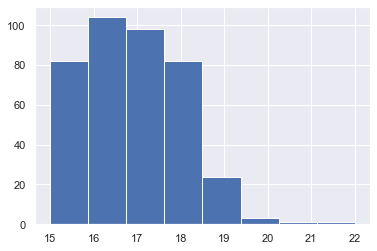

In [17]:
stud.age.hist(bins = 8)

In [18]:
# Используем функцию для расчета границ выброса
iqr_analysis(stud.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


**MATH_SCORE**

In [19]:
print(
    f'Количество нулевых значений для столбца math_score: {len(stud[stud.math_score == 0])}, что составляет {round(len(stud[stud.math_score == 0])/len(stud)*100,2)}% от всех данных')
display(stud[stud.math_score == 0])

Количество нулевых значений для столбца math_score: 37, что составляет 9.37% от всех данных


,school,sex,age,address_type,family_size,parent_status,mother_edu_rate,father_edu_rate,mother_job,father_job,school_reason,guardian,travel_time_rate,study_time_rate,failures,school_support,family_support,math_paid,activities,nursery,study_time_granular,higher_edu,internet,romantic_relat,family_relat_rate,free_time_rate,go_out_time_rate,health_rate,absences_num,math_score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


<AxesSubplot:>

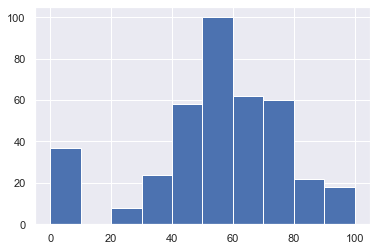

In [20]:
stud.math_score.hist(bins=10)

In [21]:
# Используем функцию для расчета границ выброса
iqr_analysis(stud.math_score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


Исходя из распредления признака, а также расчетными границами выбросов с учетом нулей предполагаю, что значение 0 - это "странные"/пропущенные значения, т.к. на текущей выборке нет ни одного значения от 0 до 20, т.е. предполагаю, что минимальный значения экзамена было в районе 20. Возможно, 0 - это недопуск/не явился на экзамен, не будем использотвать такие данные в модели и в последующем анализе.

Поскольку в целевом столбце math_score есть пустые значения, то мы не можем их заменять, т.к. это может сильно повлиять на данные. Поэтому мы запишем пустые строки в новый датафрейм для последующей работы, а в исходном датафрейме мы строки удалим.

In [22]:
# Создадим новый датафрейм df_math_score с пустыми или нулевыми значениями в колонке math_score
df_math_score = stud[(stud.math_score == 0) | (
    stud.math_score.isnull() == True)].copy()

In [23]:
# Удалим строки с пустыми или нулевыми значениями в колонке math_score из датафрейма, с которым сейчас работаем
df_numerical.drop(df_numerical[(df_numerical.math_score == 0) |
                               (df_numerical.math_score.isnull() == True)].index, inplace=True)

**FAILURES**

Посмотрим на распределение признака.

count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

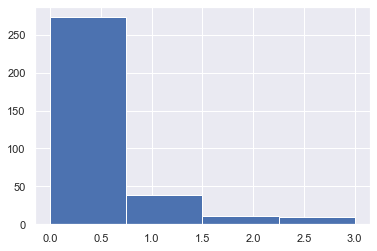

In [24]:
df_numerical.failures.hist(bins=4)
df_numerical.failures.describe()

Большая часть данных содержит значение 0. Можно было бы заполнить пропуски нулями (среднее, мода), но проверим гипотезу, что балл по математике может коррелировать с количеством неудач.

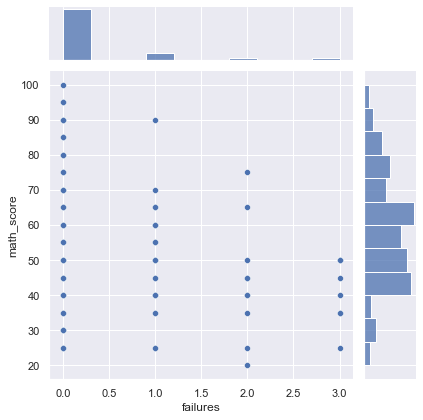

In [25]:
sns.jointplot(x='failures', y='math_score', data=df_numerical)

In [26]:
# Посмотрим корреляцию между math_score и failures
df_numerical.failures.corr(df_numerical.math_score)

-0.2893773606448118

Коэффициент корреляции 0.3 показывает слабую корреляцию признаков, но всё-таки для заполнения достаточно большого количества пропусков используем не просто среднее значение, а среднее для группы.

In [27]:
# Создадим DF с информацией о средних значениях math_score для заполненных данных failures
borders = pd.DataFrame(df_numerical.groupby(['failures'])[
                       'math_score'].mean().sort_values(ascending=False))
borders

,math_score
failures,
0.0,59.542125
1.0,50.526316
2.0,44.090909
3.0,41.500000


In [28]:
print(
    f'Количество NaN значений для столбца failures: {len(df_numerical[df_numerical.failures.isnull() == True])}, что составляет {round(len(df_numerical[df_numerical.failures.isnull() == True])/len(df_numerical)*100,2)}% от всех данных')
display(df_numerical[df_numerical.failures.isnull() == True])

Количество NaN значений для столбца failures: 20, что составляет 5.68% от всех данных


,age,failures,absences_num,math_score
21,15,NaN,0.0,75.0
48,15,NaN,2.0,70.0
54,15,NaN,6.0,65.0
68,15,NaN,2.0,40.0
91,15,NaN,4.0,90.0
107,16,NaN,2.0,90.0
108,15,NaN,6.0,65.0
114,15,NaN,8.0,45.0
115,16,NaN,2.0,80.0
125,15,NaN,0.0,60.0


In [29]:
# Определяем условия(conditions) и значения для заполнения (values)
conditions = [df_numerical['math_score'] < borders['math_score'][3], df_numerical['math_score'].between(borders['math_score'][3], borders['math_score'][2]), df_numerical['math_score'].between(
    borders['math_score'][2], borders['math_score'][1]), df_numerical['math_score'] > borders['math_score'][1]]
values = [3, 2, 1, 0]

# Применить логику, где failure NaN заменяется на указанные условия
df_numerical['failures'] = np.where(df_numerical['failures'].isnull(),
                                    np.select(conditions, values),
                                    df_numerical['failures'])

In [30]:
df_numerical.failures.describe()

count    352.000000
mean       0.289773
std        0.700922
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

**ABSENCES_NUM**

Посмотрим на распределение признака.


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences_num, dtype: float64

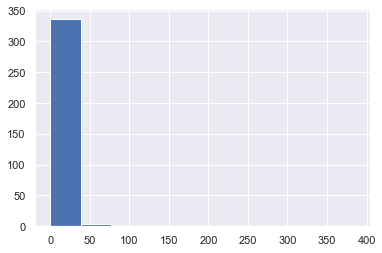

In [31]:
df_numerical.absences_num.hist()
df_numerical.absences_num.describe()

Видим, что основное распределение лежит между 0 и 25, и есть потенциальные выбросы свыше этих значений (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

[percentile(25) -1.5*IQR : percentile(75)+1.5*IQR],
где IQR = percentile(75) - percentile(25).

In [32]:
# Посмотрим на межквартальный ра
iqr_analysis(df_numerical.absences_num)

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


Межквартальный размах нам даёт число 17 для обозначения промахов, но поскольку данных мало, то посмотрим, что это за данные и исключим только те, что не могут быть (больше 365).

In [33]:
# Посмотрим на выбросы по мат. моделе
df_numerical[(df_numerical.absences_num >= 17)]

,age,failures,absences_num,math_score
40,16,1.0,25.0,55.0
74,16,0.0,54.0,55.0
89,16,0.0,18.0,35.0
103,15,0.0,26.0,30.0
118,17,1.0,20.0,40.0
123,16,0.0,18.0,65.0
183,17,0.0,56.0,40.0
198,17,1.0,24.0,90.0
203,17,0.0,18.0,30.0
205,17,1.0,28.0,45.0


In [34]:
df_numerical = df_numerical.loc[(df_numerical.absences_num <= 365) |
                                (df_numerical.absences_num.isnull() == True)]

# Уберем выбросы из изначального датафрейма, т.к. на нём будем проверять стат. гипотезы позже.
stud = stud.loc[(stud.absences_num <= 365) |
                (stud.absences_num.isnull() == True)]

In [35]:
print(
    f'Количество NaN значений для столбца failures: {len(df_numerical[df_numerical.absences_num.isnull() == True])}, что составляет {round(len(df_numerical[df_numerical.absences_num.isnull() == True])/len(df_numerical)*100,2)}% от всех данных')
display(df_numerical[df_numerical.absences_num.isnull() == True])

Количество NaN значений для столбца failures: 10, что составляет 2.85% от всех данных


,age,failures,absences_num,math_score
24,15,0.0,NaN,40.0
101,16,0.0,NaN,85.0
120,15,0.0,NaN,75.0
129,16,0.0,NaN,90.0
172,17,0.0,NaN,50.0
215,17,0.0,NaN,75.0
227,17,0.0,NaN,60.0
254,17,0.0,NaN,60.0
265,18,0.0,NaN,85.0
352,18,1.0,NaN,40.0


Мы убрали явные выбросы из колонки, теперь заполним колонку отсутсвующих значений медианой, т.к. всё еще есть большие значения, которые сильно влияют на среднее.

In [36]:
# Поскольку число отсутсвий - целое, то будем округлять среднее значение до целого.
df_numerical['absences_num'].fillna(
    (round(df_numerical['absences_num'].median(), 0)), inplace=True)

**Работаем с качественными данными**

Посмотрим на все данные, сколько в них уникальных значений.

In [37]:
df_categorical.nunique()

school                 2
travel_time_rate       4
health_rate            5
go_out_time_rate       5
free_time_rate         5
family_relat_rate      6
study_time_granular    4
study_time_rate        4
father_edu_rate        6
mother_edu_rate        5
sex                    2
address_type           2
family_size            2
parent_status          2
mother_job             5
father_job             5
school_reason          4
guardian               3
school_support         2
family_support         2
math_paid              2
activities             2
nursery                2
higher_edu             2
internet               2
romantic_relat         2
dtype: int64

**Работа с пропусками**

In [38]:
df_categorical.drop(labels=["study_time_granular"], axis=1, inplace=True)

<AxesSubplot:>

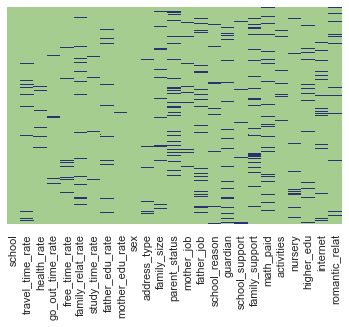

In [39]:
sns.heatmap(df_categorical.isnull(), yticklabels=False,
            cbar=False, cmap='crest')

In [40]:
# Находим, какое количество NaN
columns_categorical_nan = intitial_eda_checks(df_categorical, 0)

['parent_status', 'math_paid', 'family_support', 'father_job', 'internet', 'guardian', 'romantic_relat', 'travel_time_rate', 'family_size', 'family_relat_rate', 'father_edu_rate', 'higher_edu', 'mother_job', 'school_reason', 'address_type', 'nursery', 'health_rate', 'activities', 'free_time_rate', 'school_support', 'go_out_time_rate', 'study_time_rate', 'mother_edu_rate']
Сумма и процент значений NaN:
                    Количество      %
parent_status              45  11.39
math_paid                  40  10.13
family_support             39   9.87
father_job                 36   9.11
internet                   34   8.61
guardian                   31   7.85
romantic_relat             31   7.85
travel_time_rate           28   7.09
family_size                27   6.84
family_relat_rate          27   6.84
father_edu_rate            24   6.08
higher_edu                 20   5.06
mother_job                 19   4.81
school_reason              17   4.30
address_type               17   4.30
nu

Стратегия работы с NaN.

* Поскольку данных немного, то данные максимально оставляем.
* По всем колонкам процент NaN <50%, колонки оставляем. Будем пробовать заполнять.

**Коррелляция признаков с пропусками, чтобы определить стратегию по заполнению**

Проверяем корреляцию всех признаков. Возможно, какие-то колонки можно сразу исключить из модели и не преобразовывать данные.

<AxesSubplot:>

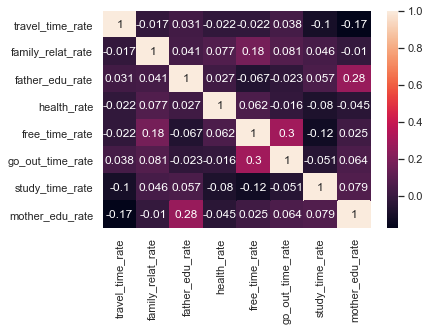

In [41]:
sns.heatmap(df_categorical[columns_categorical_nan].corr(),
            cbar=True,
            annot=True)

Вывод:
* Полностью скоррелированы study_time_rate и study_time_granular. Удалим study_time_granular.
* Средняя корреляция между father_edu_rate и mother_edu_rate (0.63)
* Слабая корреляция между go_out_time_rate и free_time_rate (0.3).

**Распределение признаков в колонках с пропусками**

Посмотрим на распределение признаков для всех категариальных данных, где есть пропуски.

In [42]:
for column in columns_categorical_nan:
    print("Информация для колонки", column.upper(), ':')
    display(pd.DataFrame(
        df_categorical[column].value_counts(normalize=True)*100))

Информация для колонки PARENT_STATUS :


,parent_status
T,89.714286
A,10.285714


Информация для колонки MATH_PAID :


,math_paid
no,56.338028
yes,43.661972


Информация для колонки FAMILY_SUPPORT :


,family_support
yes,61.516854
no,38.483146


Информация для колонки FATHER_JOB :


,father_job
other,54.874652
services,28.412256
teacher,8.077994
at_home,4.456825
health,4.178273


Информация для колонки INTERNET :


,internet
yes,84.487535
no,15.512465


Информация для колонки GUARDIAN :


,guardian
mother,68.681319
father,23.626374
other,7.692308


Информация для колонки ROMANTIC_RELAT :


,romantic_relat
no,65.934066
yes,34.065934


Информация для колонки TRAVEL_TIME_RATE :


,travel_time_rate
1.0,65.940054
2.0,26.158038
3.0,5.994550
4.0,1.907357


Информация для колонки FAMILY_SIZE :


,family_size
GT3,70.923913
LE3,29.076087


Информация для колонки FAMILY_RELAT_RATE :


,family_relat_rate
4.0,49.456522
5.0,26.902174
3.0,16.847826
2.0,4.619565
1.0,1.902174
-1.0,0.271739


Информация для колонки FATHER_EDU_RATE :


,father_edu_rate
2.0,28.571429
3.0,25.876011
4.0,23.719677
1.0,21.024259
0.0,0.539084
40.0,0.269542


Информация для колонки HIGHER_EDU :


,higher_edu
yes,94.933333
no,5.066667


Информация для колонки MOTHER_JOB :


,mother_job
other,35.372340
services,26.063830
at_home,15.425532
teacher,14.627660
health,8.510638


Информация для колонки SCHOOL_REASON :


,school_reason
course,36.243386
home,27.513228
reputation,27.248677
other,8.994709


Информация для колонки ADDRESS_TYPE :


,address_type
U,78.042328
R,21.957672


Информация для колонки NURSERY :


,nursery
yes,79.155673
no,20.844327


Информация для колонки HEALTH_RATE :


,health_rate
5.0,36.315789
3.0,23.421053
4.0,16.578947
1.0,12.368421
2.0,11.315789


Информация для колонки ACTIVITIES :


,activities
yes,51.181102
no,48.818898


Информация для колонки FREE_TIME_RATE :


,free_time_rate
3.0,39.843750
4.0,29.166667
2.0,16.406250
5.0,9.895833
1.0,4.687500


Информация для колонки SCHOOL_SUPPORT :


,school_support
no,86.787565
yes,13.212435


Информация для колонки GO_OUT_TIME_RATE :


,go_out_time_rate
3.0,32.816537
2.0,26.098191
4.0,21.705426
5.0,13.436693
1.0,5.943152


Информация для колонки STUDY_TIME_RATE :


,study_time_rate
2.0,50.000000
1.0,26.546392
3.0,16.494845
4.0,6.958763


Информация для колонки MOTHER_EDU_RATE :


,mother_edu_rate
4.0,33.418367
2.0,26.020408
3.0,24.744898
1.0,15.051020
0.0,0.765306


**FAMILY_RELAT_RATE**

Максимальное количество пропусков в колонке parent_status. По распределению признака при заполнении модой - еще большее количетсво данных получит значение "together".

Проверим гипотезу, что может быть зависимость значения parent_status от family_relat_rate.  Построим boxplot по данным без пропусков. Выглядит так, что в большинстве случаев при оценке 3 и ниже, родители, как правило "alone".

<AxesSubplot:xlabel='parent_status', ylabel='family_relat_rate'>

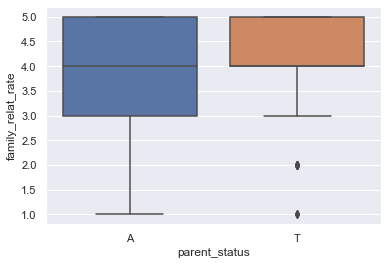

In [43]:
sns.boxplot(x='parent_status', y='family_relat_rate', data=df_categorical[(df_categorical.parent_status.isnull() == False) |
                                                                          (df_categorical.family_relat_rate.isnull() == False)])

In [44]:
print(
    f'Колисчество строк с NaN в колонке parent_status, где family_relat_rate 3: {len(df_categorical[(df_categorical.parent_status.isnull() == True) & (df_categorical.family_relat_rate <=3)])}')

Колисчество строк с NaN в колонке parent_status, где family_relat_rate 3: 12


**INTERNET**

Проверяем гипотезу, есть ли зависимость между местом проживания (город/за городом) и наличием интернета. Зависимости нет.

In [45]:
pd.DataFrame(df_categorical.groupby(['address_type'])[
             'internet'].value_counts(normalize=True))

internet
address_type internet          
R            yes       0.701299
             no        0.298701
U            yes       0.884328
             no        0.115672

**Выберем следующую стратегию по заполнению NAN:**

| Стратегия | Пояснение | Колонки |
| :- | :- | :- |
| Заполняем модой | Заполняем наиболее часто встречающимся значением, если в распределении данных оно встречается в более, чем 70% или есть признак, который встречается чаще остальных с заметным разрывом | father_job, family_support, internet, romantic_relat, guardian, travel_time_rate, family_size, higher_edu, address_type, nursery, school_support, study_time_rate
| Заполняем рандомным значением | Заполняем рандомным значением, если признаки распределены достаточно равномерно | math_paid, activities, mother_job, school_reason, health_rate 
| Заполняем на основании значений скоррелированных признаков | Заполняем исходя из скоррелированного признака | 1) father_edu_rate, mother_edu_rate 2) parent_status от family_relat_rate 3) free_time_rate и go_out_time_rate


**!** Поскольку третью стретегию сейчас не успела, то заполнила эти колонки модой.

In [46]:
# Создадим списки для первых двух стратегий
mode_columns_fill = ['father_job', 'family_support', 'internet', 'romantic_relat', 'guardian',
                     'travel_time_rate', 'family_size', 'higher_edu', 'address_type', 'nursery',
                     'school_support', 'study_time_rate', 'parent_status', 'family_relat_rate', 'free_time_rate']
rd_columns_fill = ['math_paid', 'activities', 'mother_job', 'school_reason',
                   'health_rate', 'father_edu_rate', 'mother_edu_rate', 'go_out_time_rate']
# regression_clumns_fill = ['father_edu_rate', 'mother_edu_rate','parent_status', 'family_relat_rate',
# 'free_time_rate', 'go_out_time_rate']
regression_clumns_fill = []

# Проверим, что во время аналмиза мы не потеряли колонки
if len(mode_columns_fill) + len(rd_columns_fill) + len(regression_clumns_fill) == len(columns_categorical_nan):
    print(f'Учтены все {len(columns_categorical_nan)} колонки')
else:
    print(
        f'Пропущен анализ {len(columns_categorical_nan) - (len(mode_columns_fill) + len(rd_columns_fill) + len(regression_clumns_fill)) } колонок')

Учтены все 23 колонки


**До заполнения NAN почистим некоторые данные, т.к. были замечены аномалии:**
1. family_relat_rate - есть значения -1, которых по условиям быть не должно
2. father_edu_rate - есть значение 40, которого по условию быть не должно

**FAMILY_RELAT_RATE**

Такая запись всего одна. Предположим, что это ошибка ввода: вместо 1 ввели -1. Заменим значение на 1.

In [47]:
# Посмотрим на запись
df_categorical[df_categorical.family_relat_rate == -1]

,school,travel_time_rate,health_rate,go_out_time_rate,free_time_rate,family_relat_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
25,GP,1.0,5.0,2.0,2.0,-1.0,1.0,2.0,2.0,F,U,GT3,NaN,services,services,home,mother,no,yes,yes,no,no,yes,yes,no


In [48]:
# Заменим значение на 1, проверим, что значение заменилось
df_categorical['family_relat_rate'][25] = 1
df_categorical['family_relat_rate'].iloc[25]

stud['family_relat_rate'][25] = 1

**FATHER_EDU_RATE**

Такая запись всего одна. Предположим, что это ошибка ввода: вместо 4 ввели 40. Заменим значение на 4.

In [49]:
# Посмотрим на запись
df_categorical[df_categorical.father_edu_rate == 40]

,school,travel_time_rate,health_rate,go_out_time_rate,free_time_rate,family_relat_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
11,GP,3.0,4.0,2.0,2.0,5.0,3.0,40.0,2.0,F,U,GT3,NaN,services,other,reputation,father,no,yes,no,yes,yes,yes,yes,no


In [50]:
# Заменим значение на 4, проверим, что значение заменилось
df_categorical['father_edu_rate'][11] = 4
df_categorical['father_edu_rate'].iloc[11]

stud['father_edu_rate'][11] = 4

**Заполняем пустые значения**

Заполняем модой для колонок: father_job, family_support, internet, romantic_relat, guardian, travel_time_rate, family_size, higher_edu, address_type, nursery, school_support, study_time_rate

In [51]:
mode_fill_na(df_categorical, mode_columns_fill)

,school,travel_time_rate,health_rate,go_out_time_rate,free_time_rate,family_relat_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
0,GP,2.0,3.0,4.0,3.0,4.0,2.0,4.0,4.0,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,yes,no
1,GP,1.0,3.0,3.0,3.0,5.0,2.0,1.0,1.0,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,1.0,3.0,2.0,3.0,4.0,2.0,1.0,1.0,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,no
3,GP,1.0,5.0,2.0,2.0,3.0,3.0,2.0,4.0,F,U,GT3,T,health,other,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,1.0,5.0,2.0,3.0,4.0,2.0,3.0,3.0,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,1.0,4.0,4.0,5.0,5.0,2.0,2.0,2.0,M,U,LE3,A,services,services,course,mother,no,yes,yes,no,yes,yes,no,no
391,MS,2.0,2.0,5.0,4.0,2.0,1.0,1.0,3.0,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,1.0,3.0,3.0,5.0,5.0,1.0,1.0,1.0,M,R,GT3,T,other,other,course,mother,no,no,no,no,no,yes,no,no
393,MS,3.0,5.0,1.0,4.0,4.0,1.0,2.0,3.0,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


Заполняем рандомным значением из колонки для равномерно распределенного признака для колонок: math_paid, activities, mother_job, school_reason, health_rate 

In [52]:
random_fill_na(df_categorical, rd_columns_fill)

,school,travel_time_rate,health_rate,go_out_time_rate,free_time_rate,family_relat_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
0,GP,2.0,3.0,4.0,3.0,4.0,2.0,4.0,4.0,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,yes,no
1,GP,1.0,3.0,3.0,3.0,5.0,2.0,1.0,1.0,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,1.0,3.0,2.0,3.0,4.0,2.0,1.0,1.0,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,1.0,5.0,2.0,2.0,3.0,3.0,2.0,4.0,F,U,GT3,T,health,other,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,1.0,5.0,2.0,3.0,4.0,2.0,3.0,3.0,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,1.0,4.0,4.0,5.0,5.0,2.0,2.0,2.0,M,U,LE3,A,services,services,course,mother,no,yes,yes,no,yes,yes,no,no
391,MS,2.0,2.0,5.0,4.0,2.0,1.0,1.0,3.0,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,1.0,3.0,3.0,5.0,5.0,1.0,1.0,1.0,M,R,GT3,T,other,other,course,mother,no,no,no,no,no,yes,no,no
393,MS,3.0,5.0,1.0,4.0,4.0,1.0,2.0,3.0,M,R,LE3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no


In [53]:
# Проверяем, что не осталось значений NaN
intitial_eda_checks(df_categorical, 0)

NaN значения не найдены.


## 2. Отбираем данные, пригодные для дальнейшего построения модели

Закончили обрабатывать отдельно качественные и количественные данные - совмещаем датасеты. Данный датасет будем использовать для поледующей модели.

Анализ значимых признаков будем проводить на изначальном датасете stud, в котором были исправлены выбросы. При анализе не будем использовать NAN значения и целевой признак math_score == 0.

In [54]:
new_stud = pd.concat([df_numerical, df_categorical], join='inner', axis=1)

In [55]:
new_stud.sample(5)

,age,failures,absences_num,math_score,school,travel_time_rate,health_rate,go_out_time_rate,free_time_rate,family_relat_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,family_size,parent_status,mother_job,father_job,school_reason,guardian,school_support,family_support,math_paid,activities,nursery,higher_edu,internet,romantic_relat
199,16,0.0,0.0,50.0,GP,1.0,3.0,2.0,5.0,4.0,2.0,4.0,4.0,F,U,LE3,T,teacher,teacher,reputation,mother,no,yes,no,no,yes,yes,yes,no
174,16,0.0,4.0,45.0,GP,2.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,F,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
75,15,0.0,6.0,50.0,GP,1.0,5.0,3.0,3.0,4.0,2.0,3.0,4.0,M,U,GT3,T,teacher,other,home,mother,no,yes,yes,yes,yes,yes,yes,no
368,18,0.0,0.0,50.0,MS,2.0,4.0,3.0,2.0,5.0,1.0,3.0,2.0,F,U,GT3,T,at_home,services,course,father,no,yes,yes,no,yes,yes,yes,yes
155,15,0.0,2.0,40.0,GP,1.0,1.0,4.0,4.0,4.0,2.0,3.0,2.0,M,R,GT3,T,at_home,services,course,mother,yes,no,yes,yes,yes,yes,yes,no


In [56]:
new_stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                351 non-null    int64  
 1   failures           351 non-null    float64
 2   absences_num       351 non-null    float64
 3   math_score         351 non-null    float64
 4   school             351 non-null    object 
 5   travel_time_rate   351 non-null    float64
 6   health_rate        351 non-null    float64
 7   go_out_time_rate   351 non-null    float64
 8   free_time_rate     351 non-null    float64
 9   family_relat_rate  351 non-null    float64
 10  study_time_rate    351 non-null    float64
 11  father_edu_rate    351 non-null    float64
 12  mother_edu_rate    351 non-null    float64
 13  sex                351 non-null    object 
 14  address_type       351 non-null    object 
 15  family_size        351 non-null    object 
 16  parent_status      351 non

In [57]:
intitial_eda_checks(new_stud, 0)

NaN значения не найдены.


##### 2.1 Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой экзамена по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов, при этом держим в уме, что не все числовые столбцы несут реальную числовую информацию (использование опросов и рангов).

Анализ значимых признаков будем проводить на изначальном датасете stud, в котором были исправлены выбросы. При анализе не будем использовать NAN и нули для целевого признака math_score.

In [58]:
stud[(stud.math_score != 0) | (stud.math_score.isnull() == False)].corr()

,age,mother_edu_rate,father_edu_rate,travel_time_rate,study_time_rate,failures,study_time_granular,family_relat_rate,free_time_rate,go_out_time_rate,health_rate,absences_num,math_score
age,1.000000,-0.162817,-0.163119,0.080624,-0.015627,0.227514,0.015627,0.064662,0.028707,0.133127,-0.066527,0.205834,-0.154225
mother_edu_rate,-0.162817,1.000000,0.626862,-0.174942,0.078549,-0.246495,-0.078549,-0.018627,0.024934,0.061073,-0.045811,0.030746,0.216663
father_edu_rate,-0.163119,0.626862,1.000000,-0.144663,0.012943,-0.272461,-0.012943,-0.023601,-0.025640,0.045199,0.024301,0.004587,0.129607
travel_time_rate,0.080624,-0.174942,-0.144663,1.000000,-0.102351,0.063931,0.102351,-0.025837,-0.022397,0.034413,-0.022159,-0.035707,-0.068277
study_time_rate,-0.015627,0.078549,0.012943,-0.102351,1.000000,-0.179111,-1.000000,0.039516,-0.122005,-0.051727,-0.080068,-0.043183,0.116222
failures,0.227514,-0.246495,-0.272461,0.063931,-0.179111,1.000000,0.179111,-0.012005,0.098121,0.119166,0.080832,0.137454,-0.343642
study_time_granular,0.015627,-0.078549,-0.012943,0.102351,-1.000000,0.179111,1.000000,-0.039516,0.122005,0.051727,0.080068,0.043183,-0.116222
family_relat_rate,0.064662,-0.018627,-0.023601,-0.025837,0.039516,-0.012005,-0.039516,1.000000,0.172460,0.066543,0.084714,0.022550,0.064375
free_time_rate,0.028707,0.024934,-0.025640,-0.022397,-0.122005,0.098121,0.122005,0.172460,1.000000,0.296692,0.061358,0.034514,0.019938
go_out_time_rate,0.133127,0.061073,0.045199,0.034413,-0.051727,0.119166,0.051727,0.066543,0.296692,1.000000,-0.017673,0.056049,-0.123553


<AxesSubplot:>

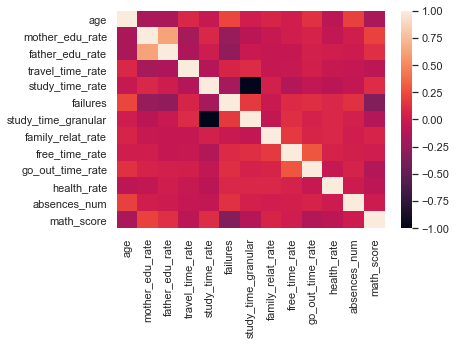

In [59]:
sns.heatmap(stud[(stud.math_score != 0) | (stud.math_score.isnull() == False)].corr(),
            cbar=True,
            annot=False)

**Выводы:**
1. Ранее уже удалили скоррелированный признак study_time_granular, тк он был полностью скоррелирован с study_time_rate
2. Из тепловой карты корреляции и таблицы сразу видно, что сильнее всего коррелируют уровни образования родителей (father_edu_rate и mother_edu_rate). Также достаточно сильная корреляция у количества свободного времени после школы (free_time_rate) и проведенного времени с друзьями (go_out_rate), что выглядит логичным. При очень сложной модели один из признаков в паре потенциально может быть удалён.
3. Что касается корреляций непосредственно со столбцом math_score:
    * failures (внеучебные неудачи), go_out_rate (время с друзями), age (возраст) - наибольшая отрицательная корреляция (-0.3, -0.13, -0.15). Логично, чем больше неудач, пропусков, времени вне учёбы, чем старше и больше других интересов, тем выше риск получить более низкую оценку.
    * father_edu_rate (образование отца) и mother_edu_rate (образование матери), studytime_rate (время внеурочных занятий) - имеет наибольную в наборе положительную корреляцию (0.12 - 0.21).
4. Для модели оставляем точно:
    * Целевой признак math_score
    * Точно количественные признаки failures, absences_num, age.
    
Также нужно учитывать, что многие из указанных выше признаков ранее определии, как "колонки - шпионы" в количественных данных. Поэтому мы их дополнительно проанализируем дальше.

### 2.2 Анализ номинативных переменных

Анализ будем проводить для колонок, которые номинативные по типу данных, но и для колонок-шпионов. Напомним, что это за список.

Анализ значимых признаков будем проводить на изначальном датасете stud, в котором были исправлены выбросы. При анализе не будем использовать NAN значения и целевой признак math_score == 0.

In [60]:
df_categorical.columns

Index(['school', 'travel_time_rate', 'health_rate', 'go_out_time_rate',
       'free_time_rate', 'family_relat_rate', 'study_time_rate',
       'father_edu_rate', 'mother_edu_rate', 'sex', 'address_type',
       'family_size', 'parent_status', 'mother_job', 'father_job',
       'school_reason', 'guardian', 'school_support', 'family_support',
       'math_paid', 'activities', 'nursery', 'higher_edu', 'internet',
       'romantic_relat'],
      dtype='object')

Можно посмотреть, различаются ли распределения оценки в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot.

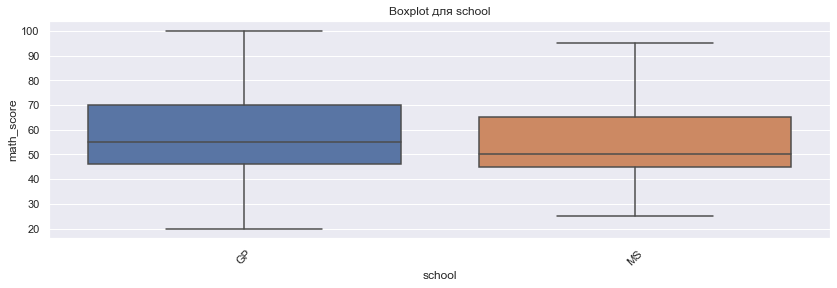

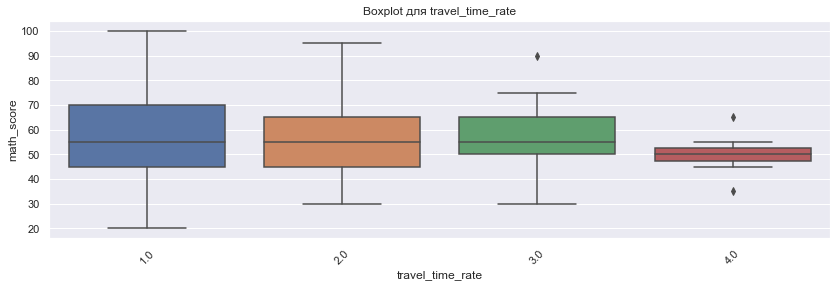

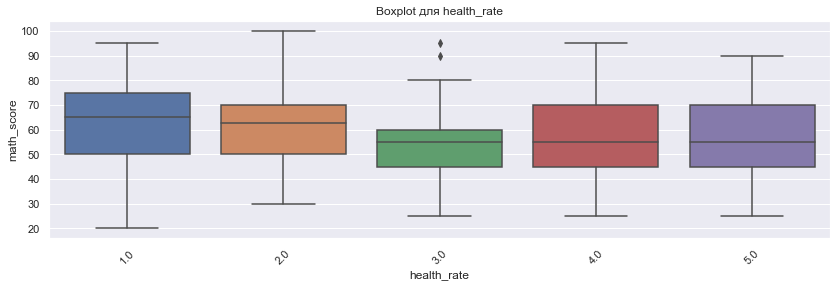

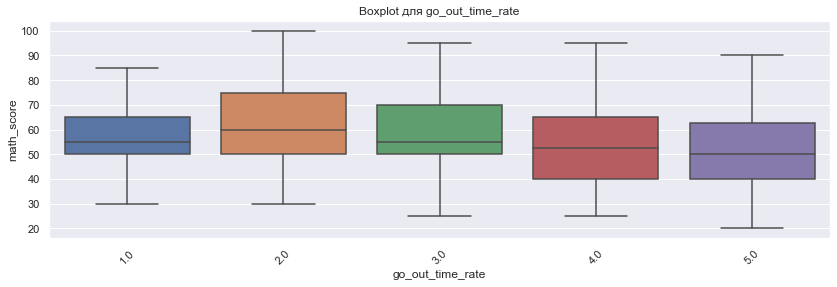

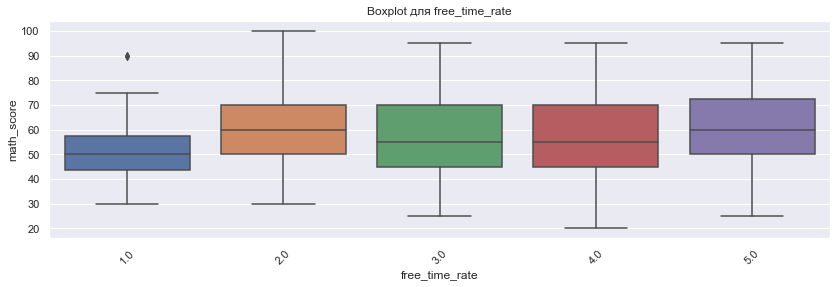

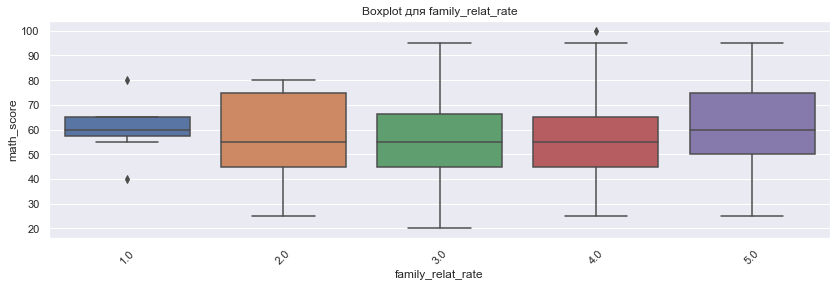

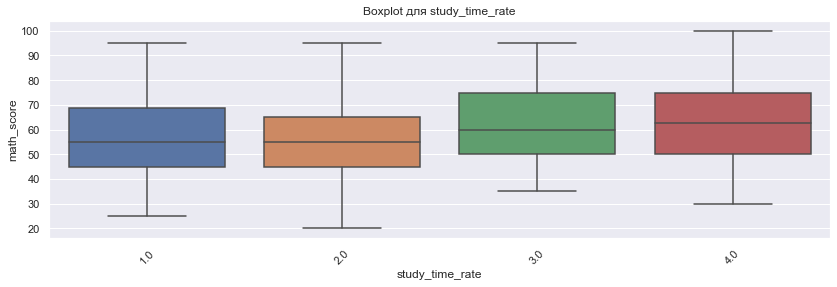

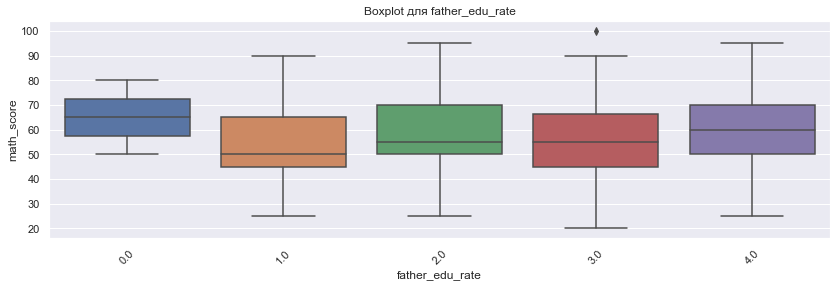

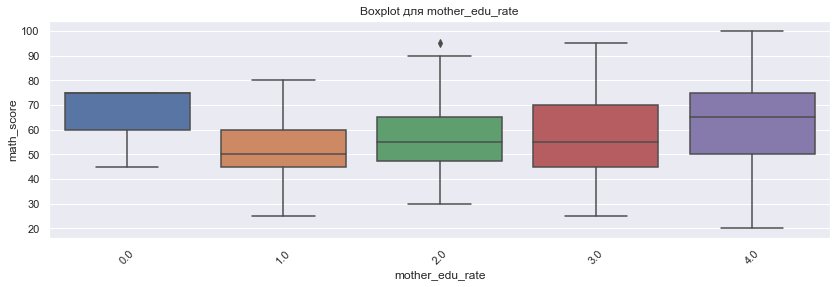

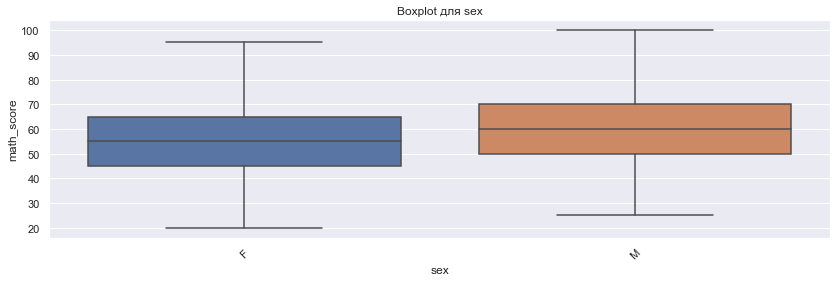

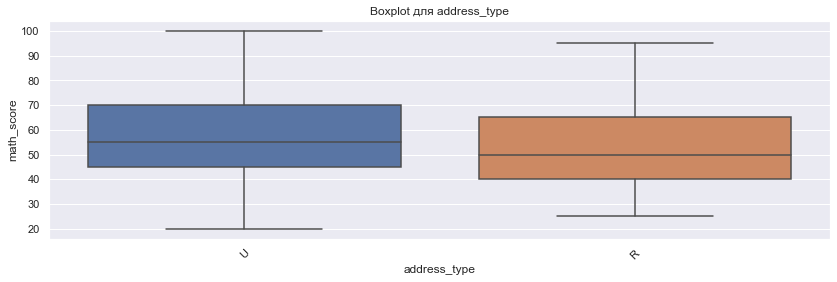

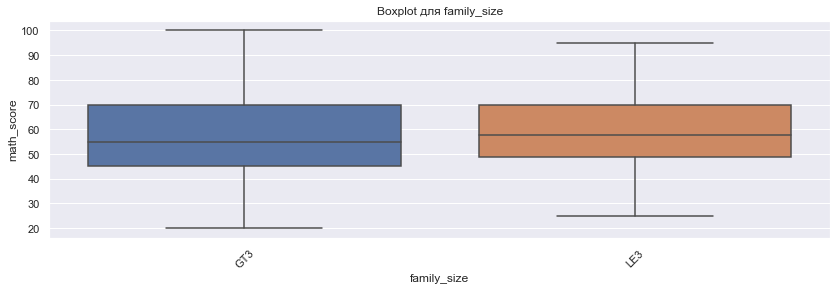

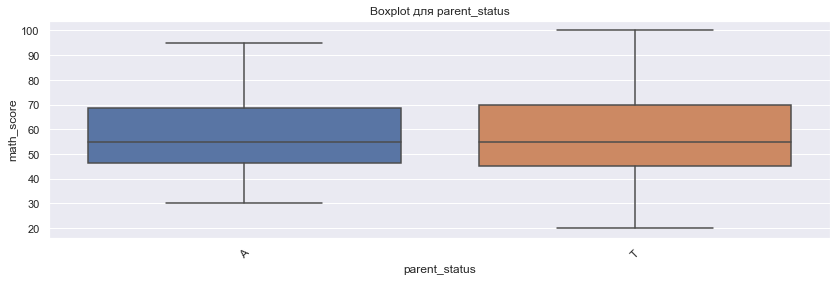

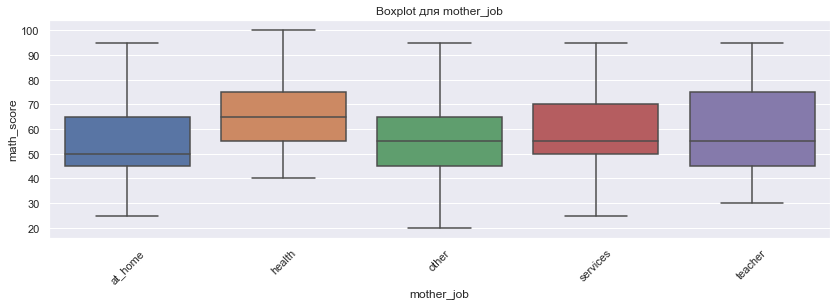

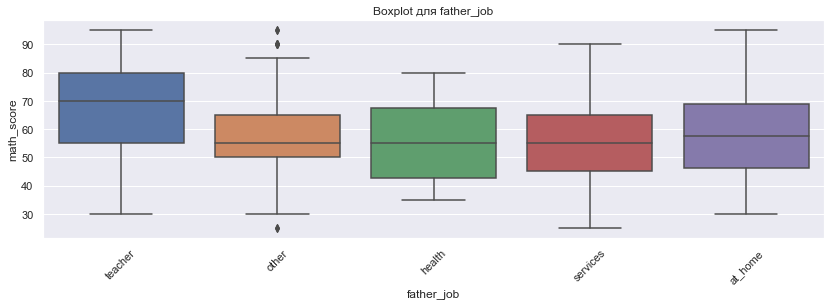

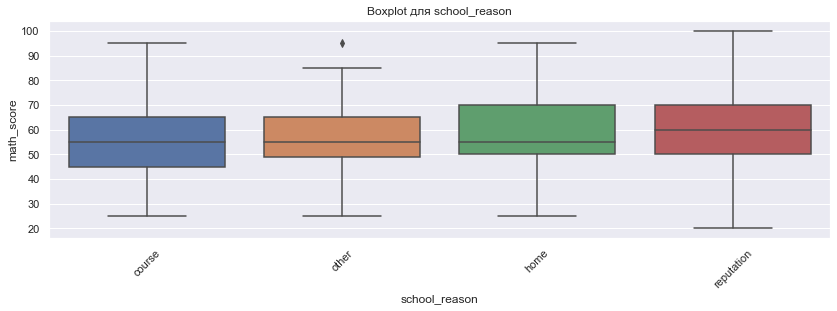

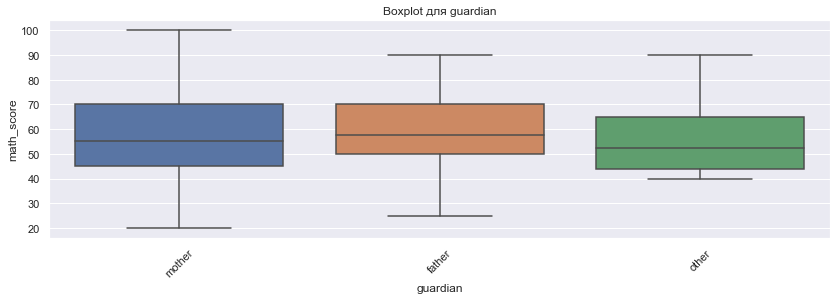

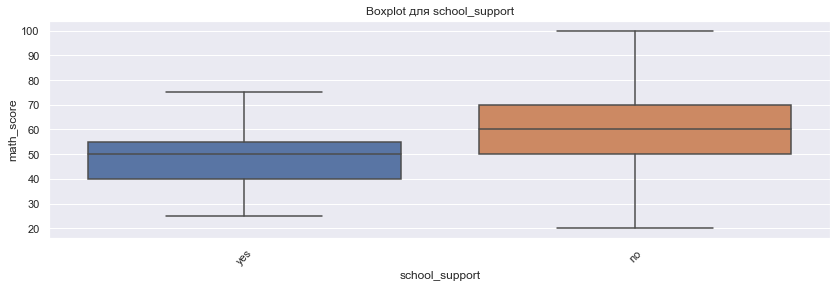

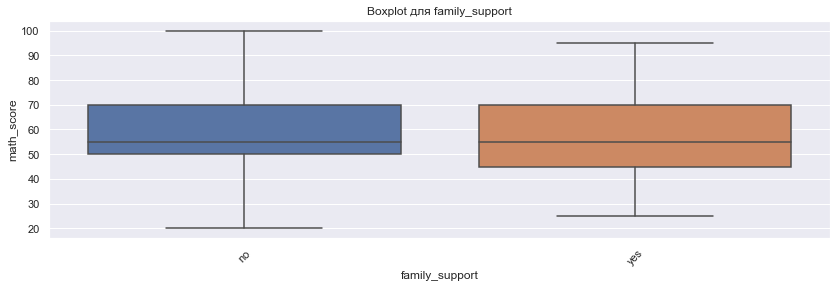

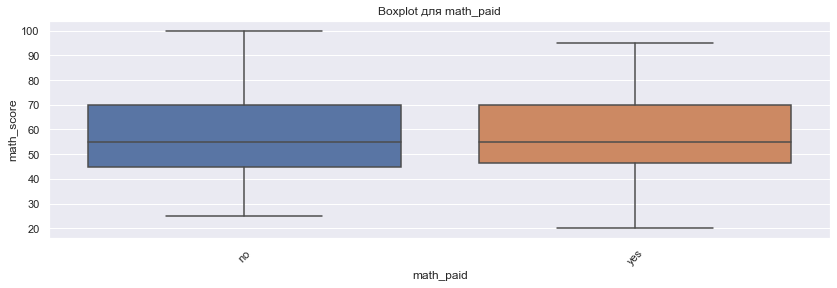

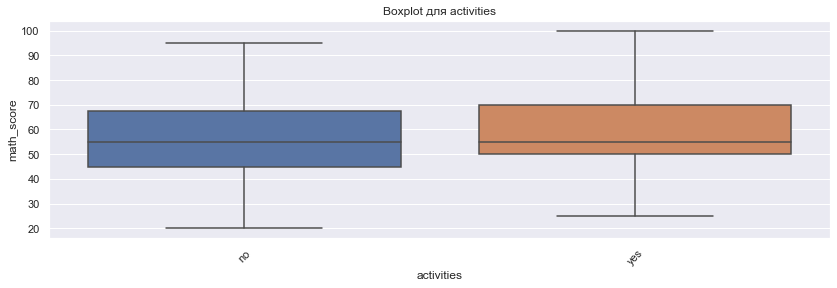

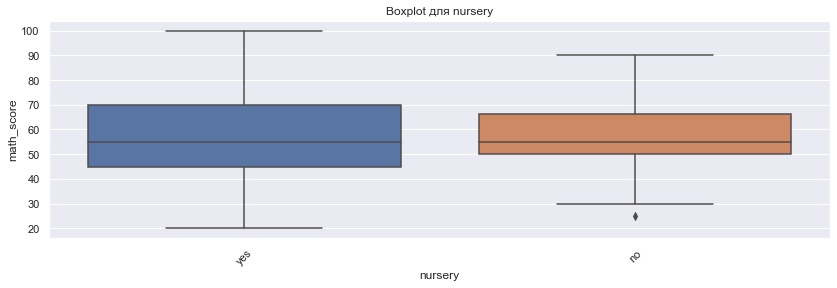

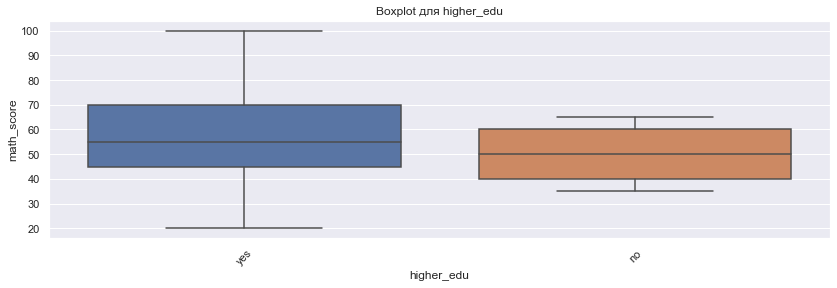

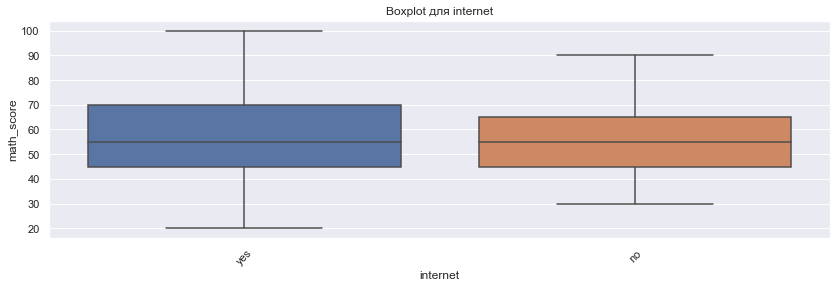

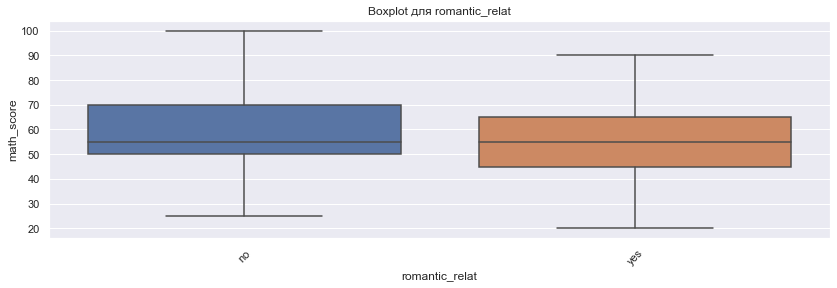

In [61]:
# Для всех номинативных колонок вызываем функцию с отрисовкой box-plot.
for column in df_categorical.columns:
    get_boxplot_2(column)

**Выводы:**
1. По графикам похоже, что все параметры, кроме parent_status, family support, math_paid, activities, nursery, internet, romantic_relat, могут влиять на оценку экзамена. 
2. Из графиков выглядит, что самые различные параметры: 
    * father_edu_rate, mather_edu_rate (интересно, что для отцов совсем без образование балл ребернка - высокий), 
    * mother_job (лучше результаты у детей врача), father_job (лучше результаты - у детей учителя), 
    * school_support (без образовательной поддержки результаты - лучше, это странно), 
    * higer_edu (планирующие поступать на вышку - имеют более хорошие баллы).


Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью **теста Стьюдента**. Проверим нулевую гипотезу о том, что распределения оценок экзамена по различным параметрам неразличимы:

In [62]:
# Проводим тест Стьюдента для всех номинальных колонок
for column in df_categorical.columns:
    get_stat_dif_2(column)

Найдены статистически значимые различия для колонки go_out_time_rate
Найдены статистически значимые различия для колонки study_time_rate
Найдены статистически значимые различия для колонки father_edu_rate
Найдены статистически значимые различия для колонки mother_edu_rate
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address_type
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки school_support


**Вывод:**

Как мы видим, серьёзно отличаются параметра: go_out_time_rate,  study_time_rate, father_edu_rate, mother_edu_rate, sex, address_type, mother_job и  school_support. Оставим эти переменные в датасете для дальнейшего построения модели. 

### 2.3 Результатыт анализа.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: go_out_time_rate,  study_time_rate, father_edu_rate, mother_edu_rate, sex,address_type, mother_job, school_support, math_score, failures, absences_num, age.



In [63]:
stud_for_model = new_stud.loc[:, ['go_out_time_rate',  'study_time_rate', 'father_edu_rate', 'mother_edu_rate',
                                  'sex', 'address_type', 'mother_job', 'school_support', 'math_score', 'failures',
                                  'absences_num', 'age']]
display(stud_for_model.head())
stud_for_model.info()

,go_out_time_rate,study_time_rate,father_edu_rate,mother_edu_rate,sex,address_type,mother_job,school_support,math_score,failures,absences_num,age
0,4.0,2.0,4.0,4.0,F,U,at_home,yes,30.0,0.0,6.0,18
1,3.0,2.0,1.0,1.0,F,U,at_home,no,30.0,0.0,4.0,17
2,2.0,2.0,1.0,1.0,F,U,at_home,yes,50.0,3.0,10.0,15
3,2.0,3.0,2.0,4.0,F,U,health,no,75.0,0.0,2.0,15
4,2.0,2.0,3.0,3.0,F,U,other,no,50.0,0.0,4.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   go_out_time_rate  351 non-null    float64
 1   study_time_rate   351 non-null    float64
 2   father_edu_rate   351 non-null    float64
 3   mother_edu_rate   351 non-null    float64
 4   sex               351 non-null    object 
 5   address_type      351 non-null    object 
 6   mother_job        351 non-null    object 
 7   school_support    351 non-null    object 
 8   math_score        351 non-null    float64
 9   failures          351 non-null    float64
 10  absences_num      351 non-null    float64
 11  age               351 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 35.6+ KB


## 3. Итоговый отчет

Итак, в результате EDA для анализа влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, были получены следующие выводы:

1. В данных достаточно много пустых значений:
    * Полностью заполненные данные только в 3 из 30 колонках age,  school, sex.
    * Если бы выбрали стратегию удаления всех NA данных, то из 395 строк осталось бы только 97 записей.
    * В связи с большим количеством пропусков было принято решение заменить пропуски. Стратегии замены были разными - мода, медиана, среднее, рандомное значение:
        * Заполняем модой для колонок: father_job, family_support, internet, romantic_relat, guardian, travel_time_rate, family_size, higher_edu, address_type, nursery, school_support, study_time_rate
        * Заполняем рандомным значением из колонки для равномерно распределенного признака для колонок: math_paid, activities, mother_job, school_reason, health_rate 
    

2. Наличие ошибок и выбросов в данных:
    * family_relat_rate - есть значения -1, которых по условиям быть не должно, заменили на 1
    * father_edu_rate - есть значение 40, которого по условию быть не должно, заменили на 4
    * absences_num: межквартальный размах показал число 17 для обозначения промахов, но поскольку строк-выбросов было мало, то посмотрели, что это за данные и исключим только те, что не могут быть физически (больше 365 дней в году).
    
    В целом, выбросов немного, что позволяет сделать вывод о том, что данные достаточно чистые.
    
3. Отдельно отметим данные целевого признака math_score.
    * Исходя из распределения признака предположили, что значение 0 - это "странные"/пропущенные значения, т.к. на текущей выборке нет ни одного значения от 0 до 20, т.е. предполагаю, что минимальный значения экзамена было в районе 20. Возможно, 0 - это недопуск/не явился на экзамен, не будем использовать такие данные в модели и в последующем анализе.
    * Поскольку в целевом столбце math_score есть пустые значения, то мы не можем их заменять, т.к. это может сильно повлиять на данные. Поэтому мы запишем пустые строки в новый датафрейм для последующей работы, а в исходном датафрейме мы строки удалим.
    * Создан датафрейм df_math_score, который можно использовать при работе с моделью в будущем.
    
4. Полностью скоррелированы study_time_rate и study_time_granular. Удалили study_time_granular из финального датасета.
5. Положительная корреляция:
    * Сильнее всего коррелируют уровни образования родителей (father_edu_rate и mother_edu_rate). Также достаточно сильная корреляция у количества свободного времени после школы (free_time_rate) и проведенного времени с друзьями (go_out_rate), что выглядит логичным. При очень сложной модели один из признаков в паре потенциально может быть удалён.
    * Что касается корреляций непосредственно со столбцом math_score:
        * failures (внеучебные неудачи), go_out_rate (время с друзьями), age (возраст) - наибольшая отрицательная корреляция (-0.3, -0.13, -0.15). Логично, чем больше неудач, пропусков, времени вне учёбы, чем старше и больше других интересов, тем выше риск получить более низкую оценку.
        * father_edu_rate (образование отца) и mother_edu_rate (образование матери), studytime_rate (время внеурочных занятий) - имеет наибольшую в наборе положительную корреляцию (0.12 - 0.21).
6. Анализ номинативных переменных выявил, что статистически значимые признаки: go_out_time_rate, study_time_rate, father_edu_rate, mother_edu_rate, sex, address_type, mother_job и school_support.
7. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это - go_out_time_rate, study_time_rate, father_edu_rate, mother_edu_rate, sex, address_type, mother_job, school_support, math_score, failures, absences_num, age. Финальный датасет для модели называется stud_for_model.